In [20]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [21]:
# Create a quantum circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)

# Apply H gate on q0
qc.h(0)

# Apply Toffoli gate (CCX) on q0, q1, q2
qc.ccx(0, 1, 2)

# Measure all qubits
qc.measure([0, 1, 2], [0, 1, 2])

# Draw the circuit
print("Quantum Circuit:")
print(qc.draw(output='text'))
print("\n" + "="*60 + "\n")

Quantum Circuit:
     ┌───┐     ┌─┐      
q_0: ┤ H ├──■──┤M├──────
     └───┘  │  └╥┘┌─┐   
q_1: ───────■───╫─┤M├───
          ┌─┴─┐ ║ └╥┘┌─┐
q_2: ─────┤ X ├─╫──╫─┤M├
          └───┘ ║  ║ └╥┘
c: 3/═══════════╩══╩══╩═
                0  1  2 




In [22]:
def test_input_combination(input_state):
    """
    Test the circuit with a specific input state
    input_state: string like '000', '001', '010', etc.
    """
    test_qc = QuantumCircuit(3, 3)
    
    # Set initial state
    for i, bit in enumerate(input_state):
        if bit == '1':
            test_qc.x(i)
    
    # Apply H gate on q0
    test_qc.h(0)
    
    # Apply Toffoli gate
    test_qc.ccx(0, 1, 2)
    
    # Measure
    test_qc.measure([0, 1, 2], [0, 1, 2])
    
    # Simulate
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(test_qc, simulator)
    job = simulator.run(compiled_circuit, shots=1024)
    result = job.result()
    counts = result.get_counts()
    
    return counts

In [23]:
# Test all 8 possible input combinations
print("Testing all input combinations:\n")
input_combinations = ['000', '001', '010', '011', '100', '101', '110', '111']

# Store all counts for plotting
all_counts = {}

for input_state in input_combinations:
    print(f"Input state: |{input_state}>")
    counts = test_input_combination(input_state)
    all_counts[input_state] = counts
    
    sorted_counts = dict(sorted(counts.items(), key=lambda x: x[1], reverse=True))
    for state, count in sorted_counts.items():
        percentage = (count / 1024) * 100
        print(f"  Output: |{state}> - {count} times ({percentage:.1f}%)")
    print()

Testing all input combinations:

Input state: |000>
  Output: |000> - 529 times (51.7%)
  Output: |001> - 495 times (48.3%)

Input state: |001>
  Output: |100> - 532 times (52.0%)
  Output: |101> - 492 times (48.0%)

Input state: |010>
  Output: |111> - 521 times (50.9%)
  Output: |010> - 503 times (49.1%)

Input state: |011>
  Output: |110> - 517 times (50.5%)
  Output: |011> - 507 times (49.5%)

Input state: |100>
  Output: |000> - 525 times (51.3%)
  Output: |001> - 499 times (48.7%)

Input state: |101>
  Output: |101> - 514 times (50.2%)
  Output: |100> - 510 times (49.8%)

Input state: |110>
  Output: |010> - 515 times (50.3%)
  Output: |111> - 509 times (49.7%)

Input state: |111>
  Output: |011> - 529 times (51.7%)
  Output: |110> - 495 times (48.3%)



In [24]:
print("\n" + "="*60)
print("Circuit Analysis:")
print("="*60)
print("1. H gate on q0 creates superposition: |0> -> (|0> + |1>)/√2")
print("2. Toffoli (CCX) gate flips q2 when both q0 and q1 are |1>")
print("3. Due to H gate, we see probabilistic outputs")
print("4. For input |011>: q1=1, so Toffoli activates when q0=1 (50% chance)")
print("="*60)


Circuit Analysis:
1. H gate on q0 creates superposition: |0> -> (|0> + |1>)/√2
2. Toffoli (CCX) gate flips q2 when both q0 and q1 are |1>
3. Due to H gate, we see probabilistic outputs
4. For input |011>: q1=1, so Toffoli activates when q0=1 (50% chance)


In [25]:
# Generate visualizations
print("\nGenerating visualizations...")

# Save circuit diagram first
try:
    # Method 1: Using the built-in save method
    qc.draw(output='mpl', filename='quantum_circuit_toffoli.png', style='iqp')
    print("✓ Circuit diagram saved as 'quantum_circuit_toffoli.png'")
except:
    # Method 2: Alternative approach if above fails
    try:
        fig = qc.draw(output='mpl', style='iqp')
        fig.savefig('quantum_circuit_toffoli.png', dpi=300, bbox_inches='tight')
        plt.close(fig)  # Close the figure to free memory
        print("✓ Circuit diagram saved as 'quantum_circuit_toffoli.png'")
    except Exception as e:
        print(f"✗ Could not save circuit diagram: {e}")


Generating visualizations...
✓ Circuit diagram saved as 'quantum_circuit_toffoli.png'


✓ Combined histogram for all inputs saved as 'all_histograms_toffoli.png'


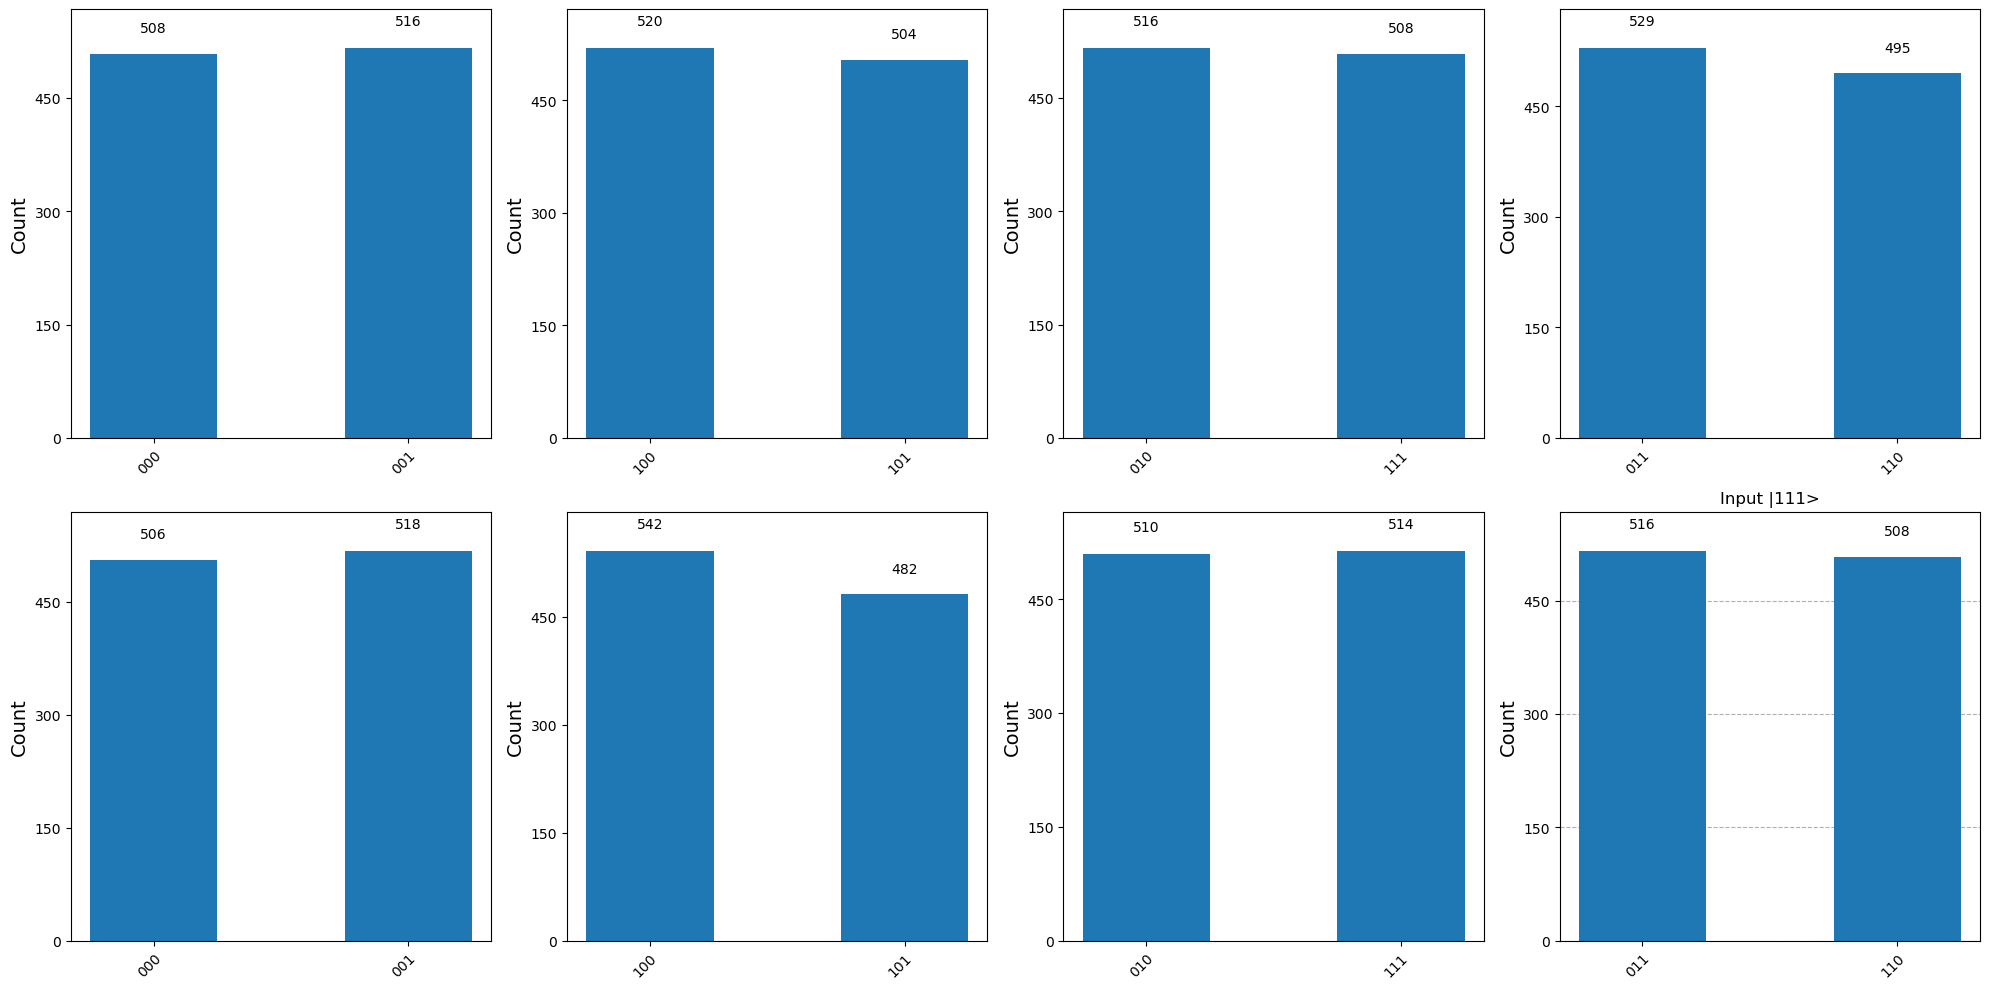


Visualization complete!


In [8]:
# Create a combined histogram for all input states
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, input_state in enumerate(input_combinations):
    counts = all_counts[input_state]
    plot_histogram(counts, ax=axes[i], title=f'Input |{input_state}>')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('all_histograms_toffoli.png', dpi=300, bbox_inches='tight')
print("✓ Combined histogram for all inputs saved as 'all_histograms_toffoli.png'")

# Show the plots
plt.show()

print("\nVisualization complete!")